First we add the imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, cohen_kappa_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier

In [3]:
TRAIN_DATA_URL = 'https://raw.githubusercontent.com/krizsanalex-szte/machine-learning-course-project-work/main/processed_data_train.csv'
TEST_DATA_URL = 'https://raw.githubusercontent.com/krizsanalex-szte/machine-learning-course-project-work/main/processed_data_test.csv'
train = pd.read_csv(TRAIN_DATA_URL)
test = pd.read_csv(TEST_DATA_URL)

X_train = train.drop('label', axis=1)
y_train = train['label']

X_test = test.drop('label', axis=1)
y_test = test['label']

Try `KNeighborsClassifier` with default parameters (number of neighbors is 5)

In [4]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('Train score ', knn.score(X_train, y_train))
print('Test score ', knn.score(X_test, y_test))

Train score  0.5196374622356495
Test score  0.26542943461372465


GridSearchCV with accuracy

In [41]:
grid_params = {
    #'n_neighbors': range(1,30),
    'n_neighbors': [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
    #'weights': 'distance',
    #'metric': ['euclidean', 'manhattan', 'minkowski']
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    refit=True
)

gs.fit(X_train, y_train)

print('Best score ', gs.best_score_)
print('Best params ', gs.best_params_)
print('Test score:',gs.score(X_test,y_test))

val_means = gs.cv_results_['mean_test_score']
val_stds = gs.cv_results_['std_test_score']

print(val_means)

Best score  0.3044891196584331
Best params  {'n_neighbors': 83}
Test score: 0.29261976694000863
[0.25539488 0.26650809 0.28021105 0.2857154  0.29337603 0.29499374
 0.29467076 0.29466977 0.29963452 0.29823098 0.29866196 0.30395074
 0.30297881 0.30254894 0.30093082 0.30168496 0.30200806 0.30384257
 0.30373295 0.30276254 0.30092855 0.30233046 0.30448912 0.30351772
 0.30233116]


GridSearchCV with cohen kappa

In [42]:
kappa_scorer = make_scorer(cohen_kappa_score, weights='quadratic')

gs_kappa = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    scoring=kappa_scorer,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    refit=True
)

gs_kappa.fit(X_train, y_train)

print('Best score ', gs_kappa.best_score_)
print('Best params ', gs_kappa.best_params_)
print('Test score:',gs_kappa.score(X_test,y_test))


val_means_kappa = gs_kappa.cv_results_['mean_test_score']
val_stds_kappa = gs_kappa.cv_results_['std_test_score']

print(val_means_kappa)

Best score  0.14820495869559547
Best params  {'n_neighbors': 59}
Test score: 0.16000221951794025
[0.08102333 0.09993649 0.11491557 0.12841718 0.13780361 0.14302695
 0.13217495 0.13412399 0.14307528 0.13894608 0.13875817 0.13999964
 0.13459869 0.14637943 0.13845834 0.14099293 0.14820496 0.14787881
 0.1410184  0.13782738 0.13427646 0.13866067 0.13590109 0.13848445
 0.14033749]


Visualize the results

Text(0, 0.5, 'accuracy')

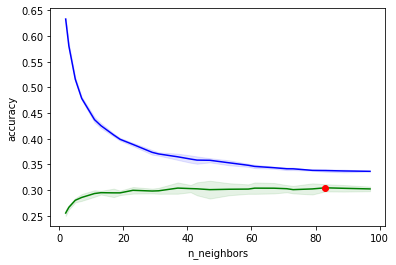

In [43]:
train_means = gs.cv_results_['mean_train_score']
train_stds = gs.cv_results_['std_train_score']

n_neigh=gs.param_grid['n_neighbors']
plt.plot(n_neigh,train_means,label='train-acc',c='b')
plt.fill_between(n_neigh, train_means - train_stds, train_means + train_stds, alpha=0.1, color="b")

plt.plot(n_neigh,val_means,label='val-acc',c='g')
plt.fill_between(n_neigh, val_means - val_stds, val_means + val_stds, alpha=0.1, color="g")

plt.plot(gs.best_params_['n_neighbors'],gs.best_score_,'o',color='r',label='best')

plt.xlabel("n_neighbors")
plt.ylabel('accuracy')

Text(0, 0.5, 'cohen kappa score')

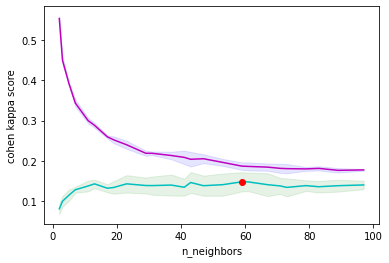

In [44]:
train_means_kappa = gs_kappa.cv_results_['mean_train_score']
train_stds_kappa = gs_kappa.cv_results_['std_train_score']

n_neigh=gs_kappa.param_grid['n_neighbors']
plt.plot(n_neigh,train_means_kappa,label='train-acc',c='m')
plt.fill_between(n_neigh, train_means_kappa - train_stds_kappa, train_means_kappa + train_stds_kappa, alpha=0.1, color="b")

plt.plot(n_neigh,val_means_kappa,label='val-acc',c='c')
plt.fill_between(n_neigh, val_means_kappa - val_stds_kappa, val_means_kappa + val_stds_kappa, alpha=0.1, color="g")

plt.plot(gs_kappa.best_params_['n_neighbors'],gs_kappa.best_score_,'o',color='r',label='best')

plt.xlabel("n_neighbors")
plt.ylabel('cohen kappa score')